In [45]:
# battery_power : 배터리가 한 번에 저장할 수 있는 총 에너지(mAh)
# 파란색 : 블루투스 있음 또는 없음
# clock_speed : 마이크로프로세서가 명령을 실행하는 속도
# dual_sim : 듀얼 sim 지원 여부
# fc : 전면 카메라 메가픽셀
# 4_g : 4G 유무
# int_memory : 내장 메모리(기가바이트)
# m_dep : 이동 깊이(cm)
# mobile_wt : 휴대폰 무게
# n_cores : 프로세서 코어 수
# pc : 기본 카메라 메가픽셀
# px_높이 : 픽셀 해상도 높이
# px_width : 픽셀 해상도 너비
# ram : 랜덤 액세스 메모리(메가바이트)
# sc_h : 모바일의 화면 높이(cm)
# sc_w : 모바일의 화면 너비(cm)
# talk_time : 단일 배터리 충전이 지속되는 가장 긴 시간은 다음과 같습니다
# 3_g : 3G 유무
# touch_screen : 터치 스크린 유무
# wifi : wifi 유무

In [72]:
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')


In [46]:
phone_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,20,756,2549,9,7,19,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,905,1988,2631,17,3,7,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,1263,1716,2603,11,2,9,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,1216,1786,2769,16,8,11,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,1208,1212,1411,8,2,15,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,1222,1890,668,13,4,19,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,915,1965,2032,11,10,16,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,868,1632,3057,9,1,5,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,336,670,869,18,10,19,1,1


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

phone_df=pd.read_csv("../datasets/phone_train.csv")
y_target=phone_df['price_range']
X_feature=phone_df.drop('price_range',axis=1)
phone_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


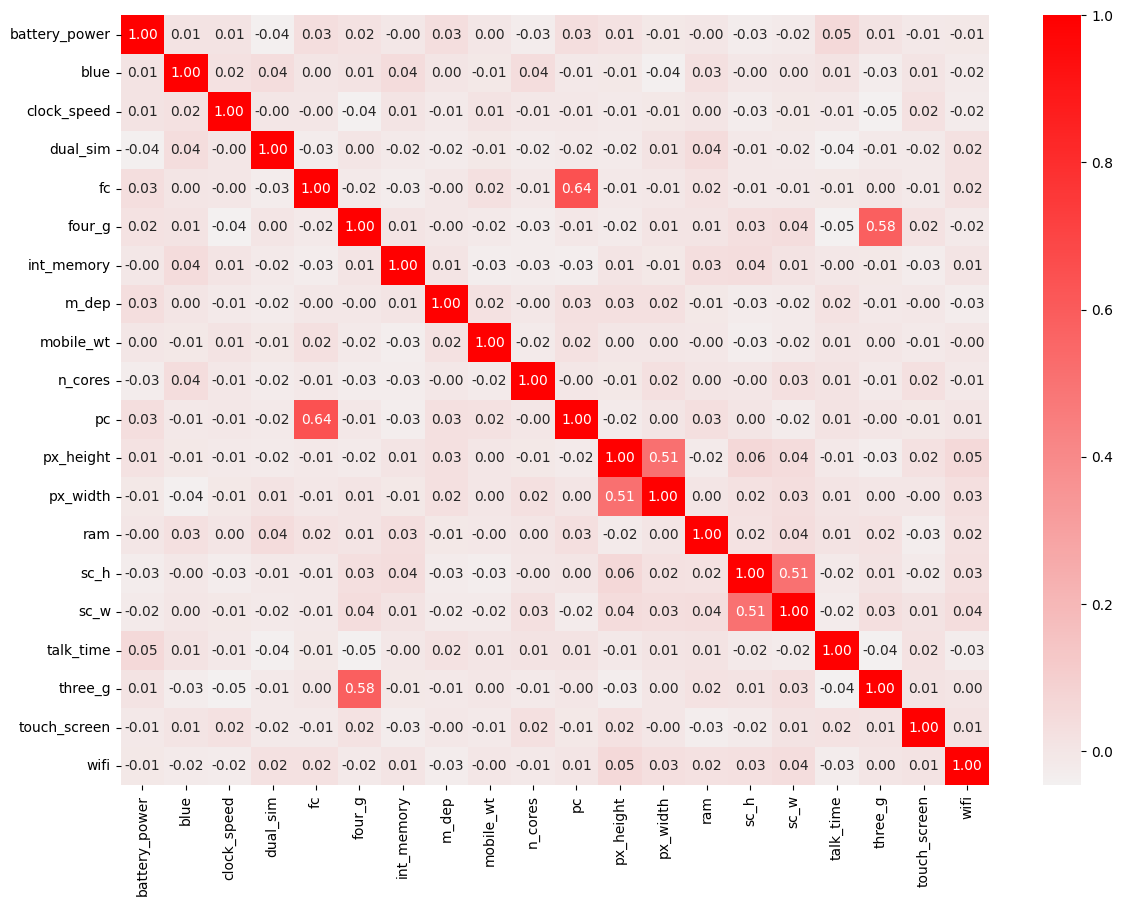

In [48]:
X_feature.corr()
cmap = sns.light_palette("red", as_cmap=True)
plt.figure(figsize=(14, 10))      
sns.heatmap(X_feature.corr(), annot=True, cmap=cmap,fmt = '.2f')
plt.show()

In [49]:
y_target=phone_df['price_range']
pd.DataFrame(y_target)
X_feature=phone_df.drop(['price_range','pc','three_g'],axis=1)



In [50]:
X_feature

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,20,756,2549,9,7,19,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,905,1988,2631,17,3,7,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,1263,1716,2603,11,2,9,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,1216,1786,2769,16,8,11,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,1208,1212,1411,8,2,15,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,1222,1890,668,13,4,19,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,915,1965,2032,11,10,16,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,868,1632,3057,9,1,5,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,336,670,869,18,10,19,1,1


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.3, random_state=42)

dt_clf = DecisionTreeClassifier(random_state=0)

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8133333333333334


In [52]:
dt_clf.feature_importances_

array([0.13563706, 0.00285723, 0.00712893, 0.00095241, 0.00941904,
       0.        , 0.00878426, 0.00321146, 0.02192948, 0.00280386,
       0.09201505, 0.07740733, 0.61916182, 0.00315115, 0.00766314,
       0.00502054, 0.        , 0.00285723])

<Axes: >

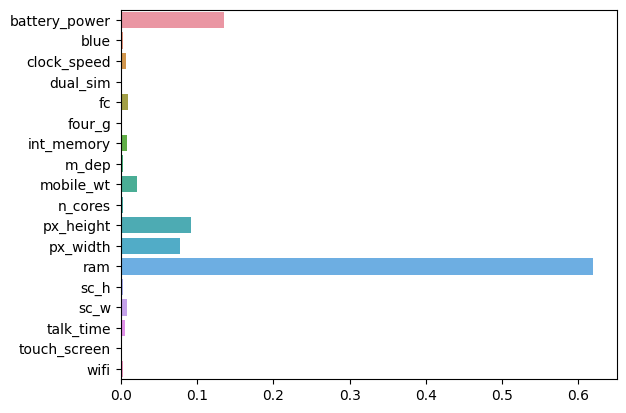

In [53]:
sns.barplot(x=dt_clf.feature_importances_, y=X_feature.columns)

In [54]:
phone_df=pd.read_csv("../datasets/phone_train.csv")
y_target=phone_df['price_range']
X_feature=phone_df[['battery_power', 'px_height','px_width','ram']]

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.3, random_state=42)

dt_clf = DecisionTreeClassifier(random_state=0)

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8483333333333334


In [85]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


phone_df=pd.read_csv("../datasets/phone_train.csv")
y_target=phone_df['price_range']
X_feature=phone_df[['battery_power', 'px_height','ram']]
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_target, test_size=0.3, random_state=42)

params={
    'max_depth' : [6],
    'min_samples_split': [16,24]
    
}

import xgboost as xgb
from xgboost import XGBClassifier

y_target=phone_df['price_range']
X_feature=phone_df[['battery_power', 'px_height','px_width','ram']]
xgb = XGBClassifier(random_state=0)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8666666666666667


In [70]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

xgb = XGBClassifier(random_state=0)
scaler = StandardScaler()
scaler.fit(X_feature)
X_feature_scaled = scaler.transform(X_feature)
X_feature_scaled = pd.DataFrame(data = X_feature_scaled, columns = X_feature.columns)

y_target=phone_df['price_range']
X_feature=X_feature_scaled


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
from sklearn.model_selection import GridSearchCV

params={
    'max_depth' : [6],
    'min_samples_split': [16,24]
}


grid_cv=GridSearchCV(xgb, param_grid=params, scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print("Accuracy:", accuracy)


Accuracy: 0.92
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[16:58:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:58:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:58:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:58:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[16:58:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd9

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# 데이터 불러오기

# 타겟 변수와 피처 변수 설정
y_target = phone_df['price_range']
X_features = phone_df[['battery_power', 'px_height','ram']]

# 데이터 전처리: 표준화 (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 학습
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)

# 예측 및 평가
y_pred = lr_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


params={'penalty':['l2','l1','elasticnet'],
        'C':[0.01,0.1,1,5,10,15,20,30]}


grid_cv=GridSearchCV(lr_clf, param_grid=params, scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print("Accuracy:", accuracy)
print(grid_cv.best_estimator_)
print(grid_cv.best_score_)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Accuracy: 0.9
LogisticRegression(C=10, random_state=0)
0.9114285714285714


In [84]:
X_feature.corr()

,battery_power,px_height,px_width,ram
battery_power,1.000000,0.014901,-0.008402,-0.000653
px_height,0.014901,1.000000,0.510664,-0.020352
px_width,-0.008402,0.510664,1.000000,0.004105
ram,-0.000653,-0.020352,0.004105,1.000000


In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# 데이터 불러오기

# 타겟 변수와 피처 변수 설정
y_target = phone_df['price_range']
X_features = phone_df[['battery_power', 'px_height','ram']]

# 데이터 전처리: 표준화 (Standardization)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_features)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 학습
lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)

# 예측 및 평가
y_pred = lr_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


params={'penalty':['l2','l1','elasticnet','none'],
        'C':[0.01,0.1,1,5,10]}


grid_cv=GridSearchCV(lr_clf, param_grid=params, scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuracy: 0.8883333333333333
